In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from scipy.stats import uniform, randint

In [82]:
telco = pd.read_csv('Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
telco.shape

(7043, 21)

In [84]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [86]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [87]:
telco.drop(columns='customerID', inplace=True)

In [88]:
telco['TotalCharges'] = pd.to_numeric(telco.TotalCharges, errors='coerce')
telco.TotalCharges.isnull().sum()

np.int64(11)

In [89]:
telco[np.isnan(telco['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
Let's see if there are any other 0 values in the tenure column.

In [90]:
telco[telco['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [91]:
telco = telco[telco['tenure'] != 0]

In [92]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


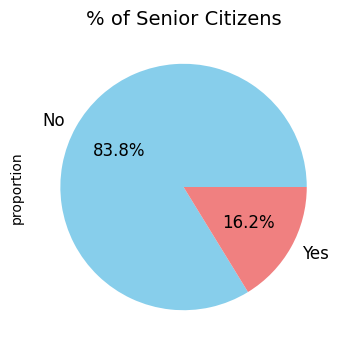

In [93]:
senior_citizen_percentage = telco['SeniorCitizen'].value_counts(normalize=True) * 100
ax = senior_citizen_percentage.plot.pie(
    autopct='%.1f%%',
    labels=['No', 'Yes'],
    figsize=(4,4),
    fontsize=12,
    colors=['skyblue', 'lightcoral']
)
ax.set_title('% of Senior Citizens', fontsize=14)
plt.show()

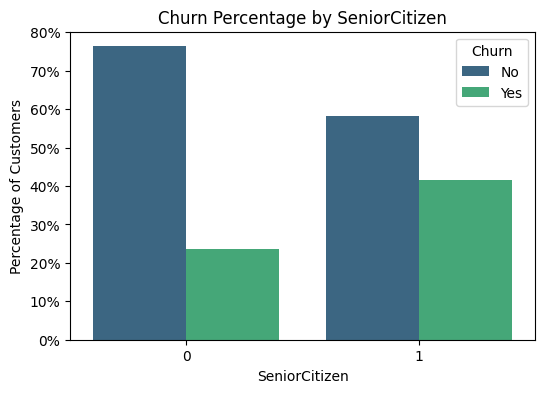

In [94]:
def plot_churn_percentages(feature):
    grouped = telco.groupby(feature)["Churn"].value_counts().unstack()
    percentages = grouped.apply(lambda x: x / x.sum(), axis=1)
    percentages = percentages.reset_index().melt(id_vars=feature, var_name="Churn", value_name="Percentage")

    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=feature, y="Percentage", hue="Churn", data=percentages, palette='viridis')
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

    plt.ylabel("Percentage of Customers")
    plt.title(f"Churn Percentage by {feature}")
    plt.show()

plot_churn_percentages("SeniorCitizen")

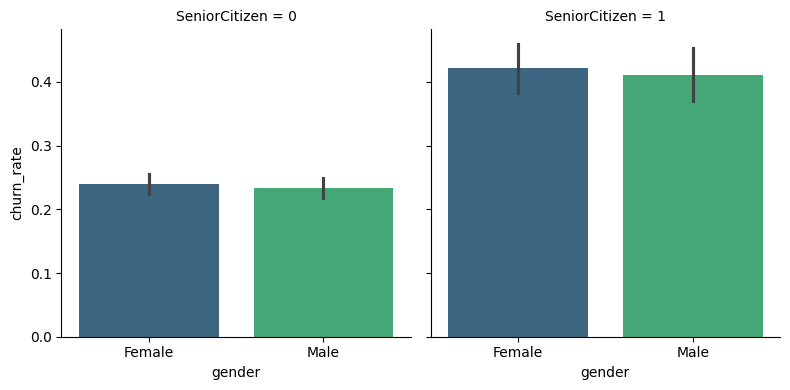

In [95]:
telco['churn_rate'] = telco['Churn'].replace("No", 0).replace("Yes", 1)
f = sns.FacetGrid(telco, col="SeniorCitizen", height=4)
ax = f.map(sns.barplot, "gender", "churn_rate", palette = "viridis", order= ['Female', 'Male'])

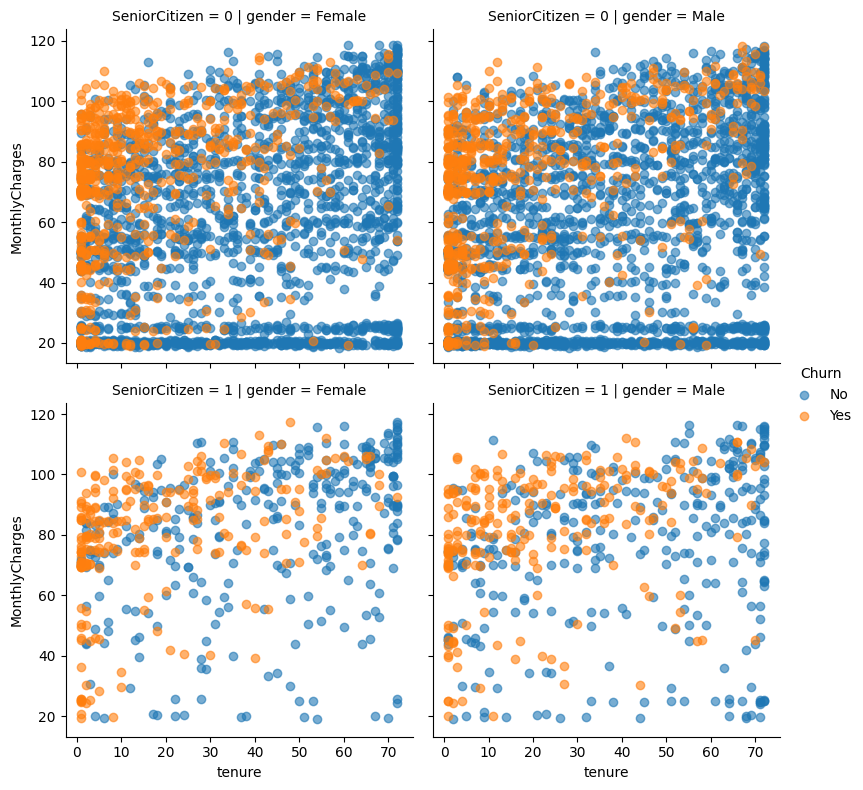

In [96]:
f = sns.FacetGrid(telco, row='SeniorCitizen', col="gender", hue="Churn", height=4)
f.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
f.add_legend();

Gender is not an indicative of churn.
SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
There are no special relations between this categorical values and the main numerical features.

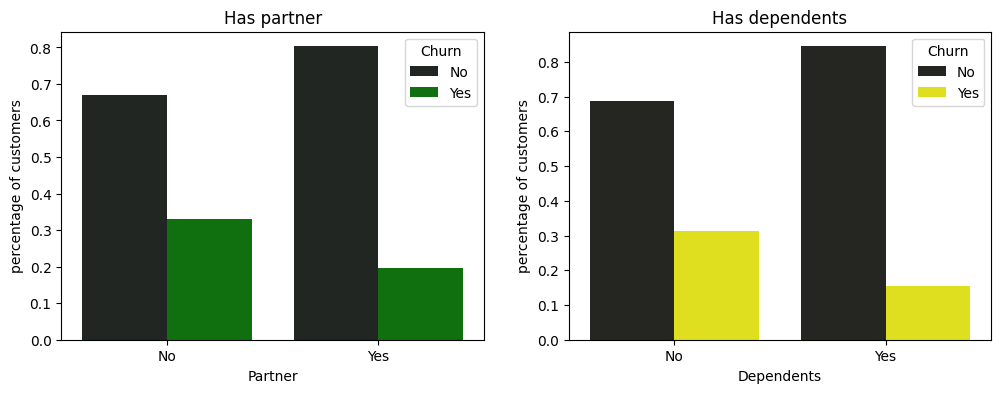

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Has partner")
axes[1].set_title("Has dependents")
axis_y = "percentage of customers"

partner_churn = telco.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()
partner_churn = partner_churn.reset_index().melt(id_vars='Partner', var_name='Churn', value_name=axis_y)
sns.barplot(x='Partner', y=axis_y, hue='Churn', data=partner_churn, ax=axes[0], color='green')

dependents_churn = telco.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()
dependents_churn = dependents_churn.reset_index().melt(id_vars='Dependents', var_name='Churn', value_name=axis_y)
sns.barplot(x='Dependents', y=axis_y, hue='Churn', data=dependents_churn, ax=axes[1], color='yellow')
plt.show()

Customers that doesn't have partners are more likely to churn & customers without dependents are also more likely to churn

<Figure size 1000x500 with 0 Axes>

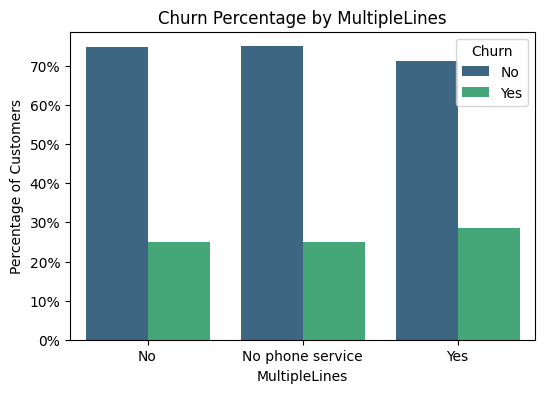

In [98]:
plt.figure(figsize=(10, 5))
plot_churn_percentages("MultipleLines")

Few customers doesn't have phone service. Customers with multiple lines have a slightly higher churn rate

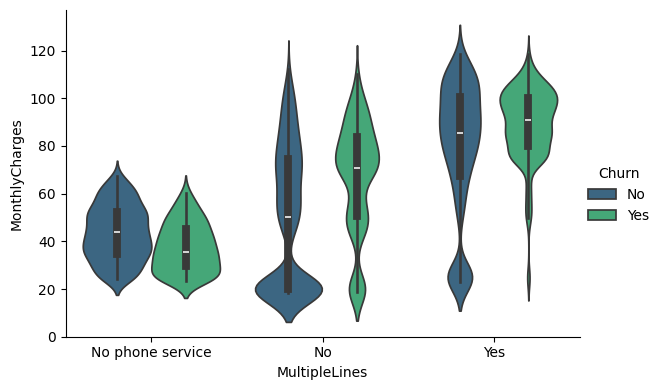

In [99]:
ax = sns.catplot(data=telco, x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin", split=False, palette="viridis", height=4, aspect=1.5)

<Figure size 1000x500 with 0 Axes>

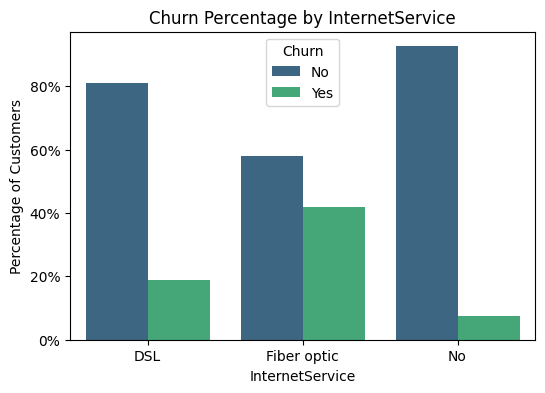

In [100]:
plt.figure(figsize=(10, 5))
plot_churn_percentages("InternetService")

Clients without internet have a very low churn rate & customers with fiber are more probable to churn than those with DSL connection

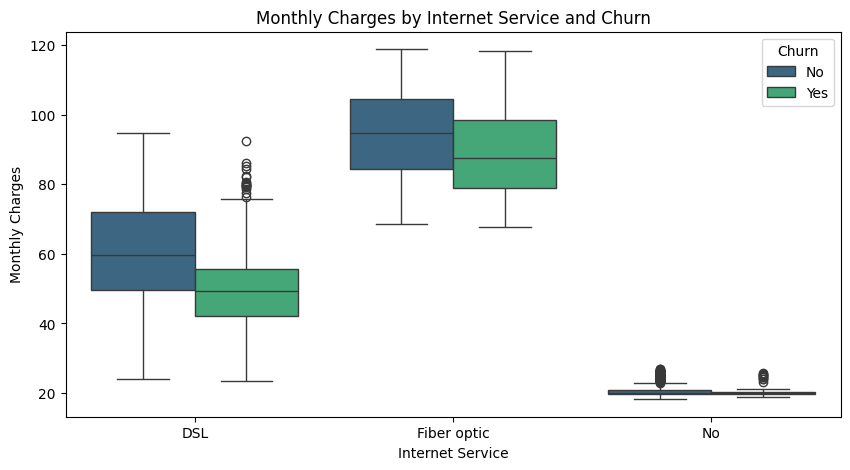

In [101]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=telco, x="InternetService", y="MonthlyCharges", hue="Churn", palette="viridis")
plt.title("Monthly Charges by Internet Service and Churn")
plt.xlabel("Internet Service")
plt.ylabel("Monthly Charges")
plt.show()

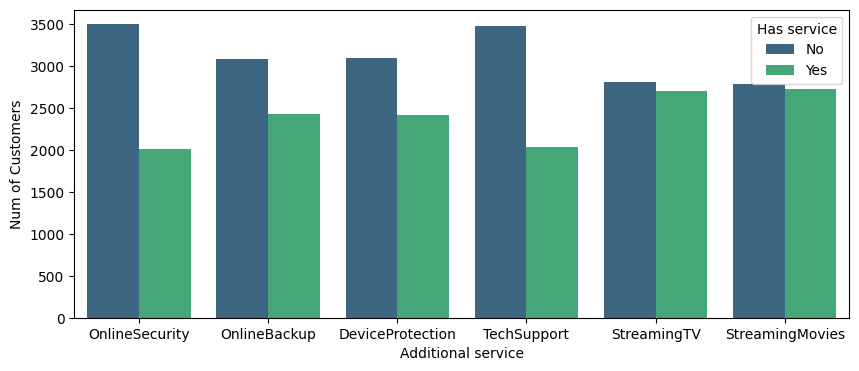

In [102]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(telco[telco["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df1, x='variable', hue='Has service', palette='viridis')
ax.set(xlabel='Additional service', ylabel='Num of Customers')
plt.show()

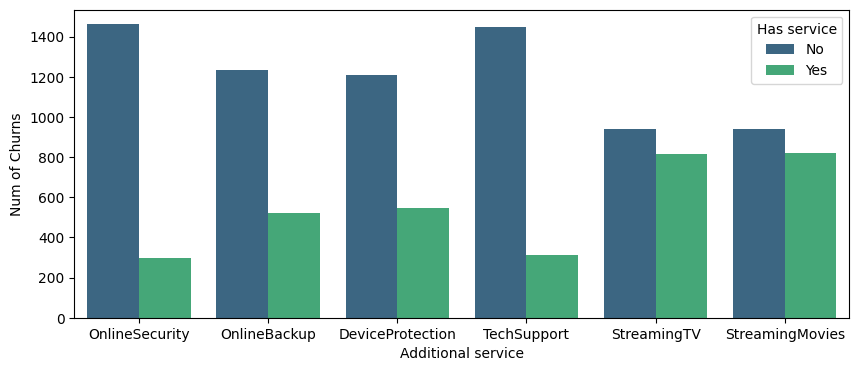

In [103]:
plt.figure(figsize=(10, 4))
df1 = telco[(telco.InternetService != "No") & (telco.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'], palette='viridis')
ax.set(xlabel='Additional service', ylabel='Num of Churns')
plt.show()

Customers with the first 4 additionals are more unlikely to churn. Streaming service is not predictive for churn

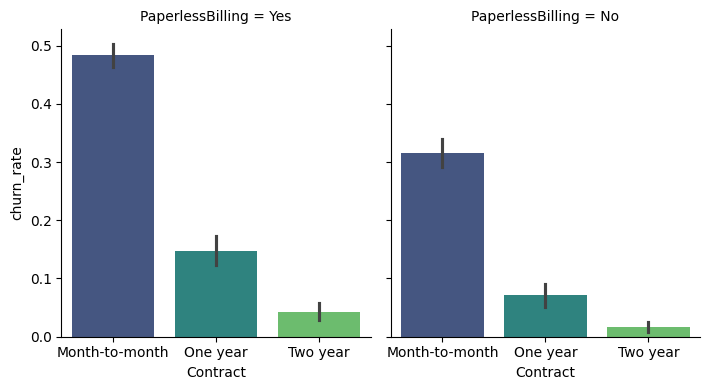

In [104]:
f = sns.FacetGrid(telco, col="PaperlessBilling", height=4, aspect=.9)
ax = f.map(sns.barplot, "Contract", "churn_rate", palette = "viridis", order= ['Month-to-month', 'One year', 'Two year'])

<Figure size 1000x500 with 0 Axes>

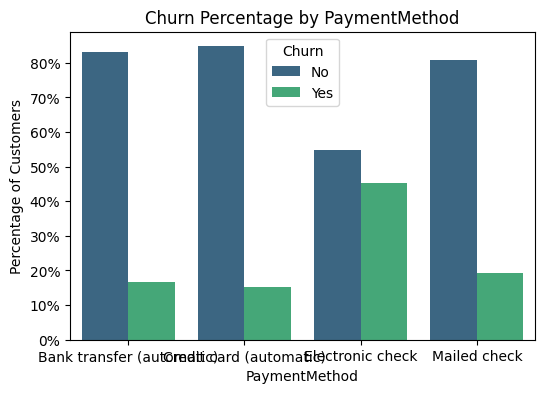

In [105]:
plt.figure(figsize=(10, 5))
plot_churn_percentages("PaymentMethod")
plt.show()

Customers with paperless billing are more probable to churn.
The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
Short term contracts have higher churn rates.
One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour.

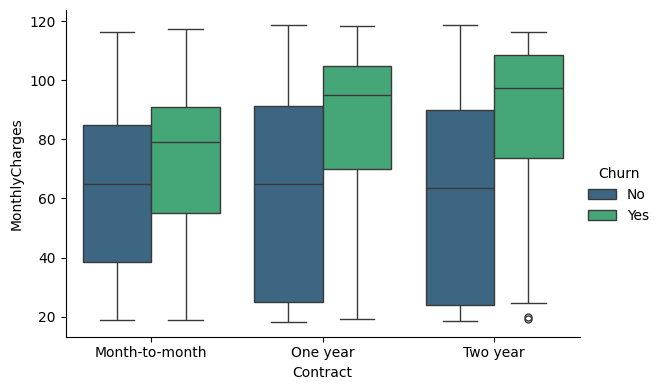

In [106]:
ax = sns.catplot(data=telco, x="Contract", y="MonthlyCharges", hue="Churn", kind="box", height=4, aspect=1.5, palette='viridis')

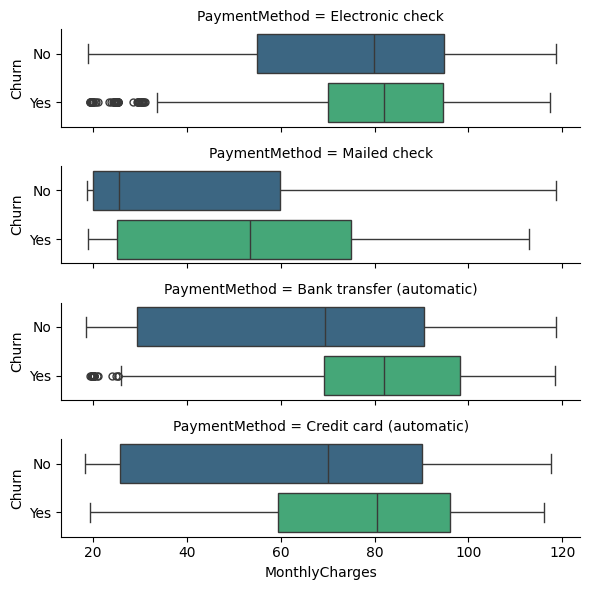

In [107]:
ax = sns.catplot(data=telco, x="MonthlyCharges", y="Churn", row="PaymentMethod", kind="box", height=1.5, aspect=4, orient='h', palette='viridis')

Longer contracts are more affected by higher monthly charges (for churn rate).
Mailed checks have lower charges.
There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check.

Text(0.5, 1.0, '# of Customers by their tenure')

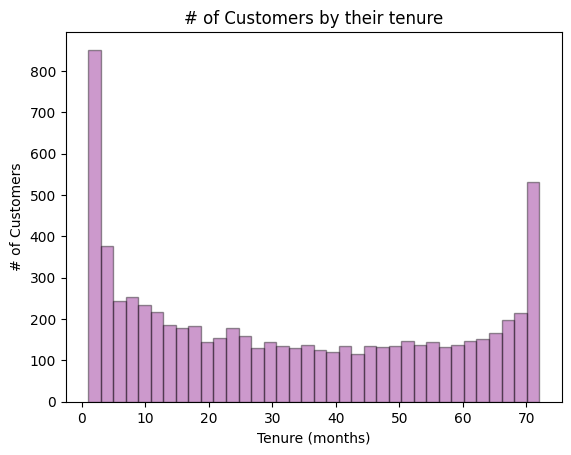

In [108]:
ax = sns.distplot(telco.tenure, hist=True, kde=False, bins=36, color = 'purple', hist_kws={'edgecolor':'black'})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

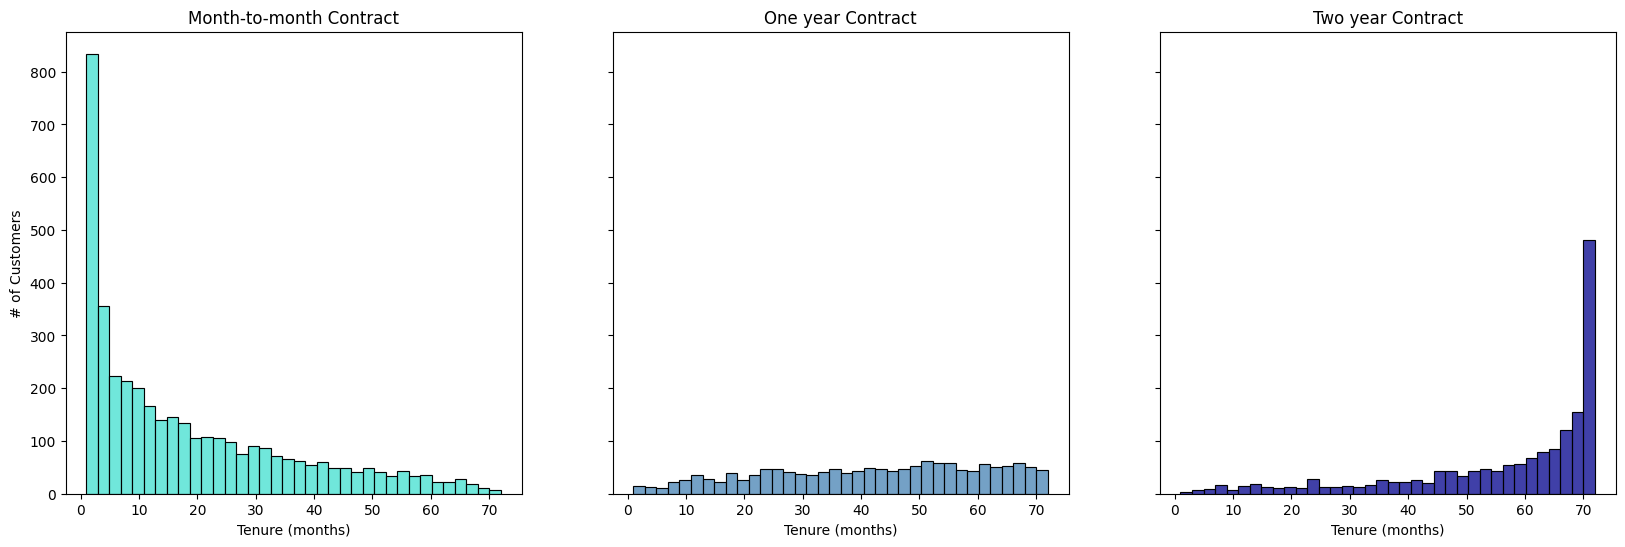

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))
contracts = ['Month-to-month', 'One year', 'Two year']
colors = ['turquoise', 'steelblue', 'darkblue']
for i, contract in enumerate(contracts):
    ax = axes[i]
    subset = telco[telco.Contract == contract]['tenure']
    sns.histplot(subset, bins=36, color=colors[i], edgecolor='black', ax=ax)
    ax.set_xlabel('Tenure (months)')
    ax.set_title(f'{contract} Contract')

axes[0].set_ylabel('# of Customers')
plt.show()

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.
This is also what we saw in the earlier chart on correlation with the churn rate.

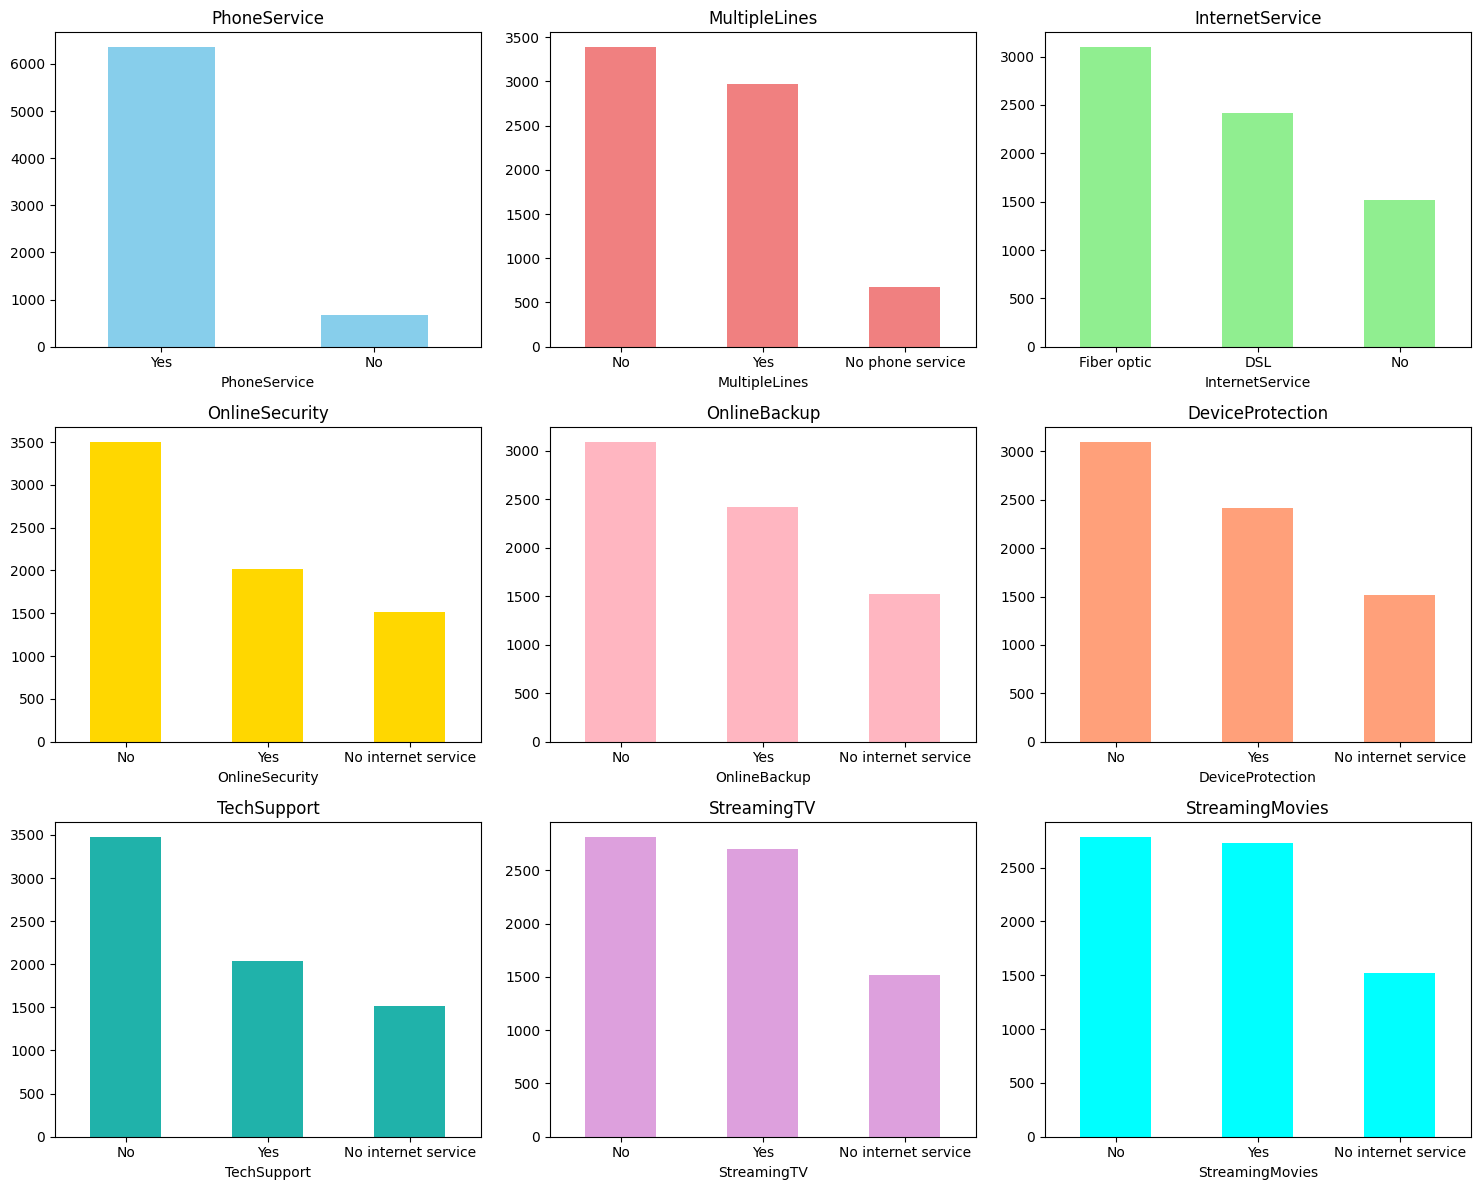

In [110]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightsalmon', 'lightseagreen', 'plum', 'cyan']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, service in enumerate(services):
    row_index = i // 3
    col_index = i % 3
    ax = telco[service].value_counts().plot(kind='bar', ax=axes[row_index, col_index], rot=0, color=colors[i])
    ax.set_title(service)

plt.tight_layout()
plt.show()

In [111]:
telco.drop(columns="churn_rate", inplace=True)

In [112]:
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
                    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

telco_encoded = pd.get_dummies(telco, columns=categorical_cols, drop_first=True)
telco_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [113]:
bool_cols = telco_encoded.select_dtypes(include=['bool']).columns
telco_encoded[bool_cols] = telco_encoded[bool_cols].astype(int)
telco_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [114]:
numerical_cols = ["MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
telco_encoded[numerical_cols] = scaler.fit_transform(telco_encoded[numerical_cols])

In [115]:
telco_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,-1.161694,-0.994194,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,-0.260878,-0.173740,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,-0.363923,-0.959649,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,-0.747850,-0.195248,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,0.196178,-0.940457,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [116]:
X = telco_encoded.drop('Churn_Yes', axis=1)
y = telco_encoded['Churn_Yes']

In [117]:
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Model Training

In [119]:
model_scores = []
models = [
    ('Random Forest', RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.5]}),
    
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'), {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),

    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}),

    ('K-Nearest Neighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),

    ('Decision Tree', DecisionTreeClassifier(random_state=42), {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),

    ('Ada Boost', AdaBoostClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.5]}),

    ('XG Boost', XGBClassifier(random_state=42), {'max_depth': randint(3, 6), 'learning_rate': uniform(0.01, 0.2), 'n_estimators': randint(100, 300), 'subsample': uniform(0.8, 0.2)}),

    ('Naive Bayes', GaussianNB(), {})
]

best_model = None
best_accuracy = 0.0

for name, model, param_grid in models:
    print(f"\nEvaluating {name}...")

    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(X_train, y_train)
        tuned_model = random_search.best_estimator_
        tuned_model.fit(X_train, y_train)
        y_pred = tuned_model.predict(X_test)
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(X_train, y_train)
        tuned_model = grid_search.best_estimator_
        tuned_model.fit(X_train, y_train)
        y_pred = tuned_model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3))
    print("Test Precision:", round(precision, 3))
    print("Test Recall:", round(recall, 3))
    print("Test F1 Score:", round(f1, 3))
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        if name == 'XG Boost' or param_grid: best_model = tuned_model
        else: best_model = model

print("Best Model:")
print("Test Accuracy:", round(best_accuracy, 3))
print("Model:", best_model)


Evaluating Random Forest...
Model: Random Forest
Test Accuracy: 0.951
Test Precision: 0.948
Test Recall: 0.97
Test F1 Score: 0.959


Evaluating Gradient Boosting...
Model: Gradient Boosting
Test Accuracy: 0.953
Test Precision: 0.948
Test Recall: 0.973
Test F1 Score: 0.961


Evaluating Support Vector Machine...
Model: Support Vector Machine
Test Accuracy: 0.963
Test Precision: 0.961
Test Recall: 0.976
Test F1 Score: 0.968


Evaluating Logistic Regression...
Model: Logistic Regression
Test Accuracy: 0.937
Test Precision: 0.955
Test Recall: 0.936
Test F1 Score: 0.945


Evaluating K-Nearest Neighbors...
Model: K-Nearest Neighbors
Test Accuracy: 0.955
Test Precision: 0.933
Test Recall: 0.994
Test F1 Score: 0.962


Evaluating Decision Tree...
Model: Decision Tree
Test Accuracy: 0.935
Test Precision: 0.939
Test Recall: 0.952
Test F1 Score: 0.945


Evaluating Ada Boost...
Model: Ada Boost
Test Accuracy: 0.926
Test Precision: 0.926
Test Recall: 0.949
Test F1 Score: 0.937


Evaluating XG Boost.